In [2]:
#Jupyter: Create New Blank Notebook
import tensorflow as tf
print(tf)
print(tf.__version__)

<module 'tensorflow' from '.\\tensorflow\\venv\\lib\\site-packages\\tensorflow\\__init__.py'>
2.5.0


# 기본 예측 - 선형 출력하기

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
tf.model.summary <bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x000002DA630F2C70>>
Epoch 1/100
1/1 [==============================] - 0s 259ms/step - loss: 36.9436
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 16.5956
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 7.4592
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 3.3566
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 1.5142
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 0.6866
Epoch 7/100
1/1 [==============================] 

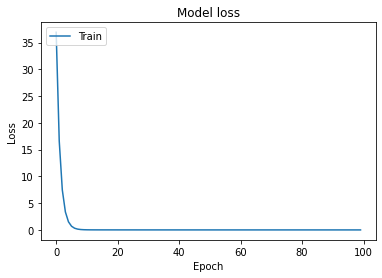

In [2]:
# Lab 3 Minimizing Cost
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

x_train = [1,2,3,4]
y_train = [3, 5, 7, 9]

tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.Dense(units=1, input_dim=1))

sgd = tf.keras.optimizers.SGD(learning_rate=0.1)
tf.model.compile(loss='mse', optimizer=sgd)

tf.model.summary()

print('tf.model.summary',tf.model.summary)

# fit() trains the model and returns history of train
history = tf.model.fit(x_train, y_train, epochs=100)

y_predict = tf.model.predict(np.array([5, 4]))
print(y_predict)

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [13]:
y_predict = tf.model.predict(np.array([0,1]))
print(y_predict)

[[ 0.9245573 ]
 [-0.04978299]]


In [18]:
[2*i+3 for i in range(4)]

[3, 5, 7, 9]

# 공식 문서 한국어 번역
## 텐서플로 2.0 시작하기: 초보자용

In [16]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.5.0


In [19]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 1s 0us/step


In [27]:
# 이름 저장
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


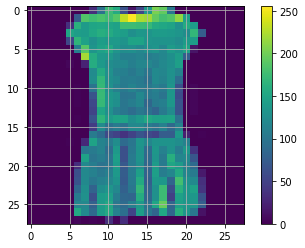

In [35]:
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(True)
plt.show()


In [44]:
# 들어가는 값은 0~1이므로 255로 나눈다.
train_images = train_images / 255.0

test_images = test_images / 255.0


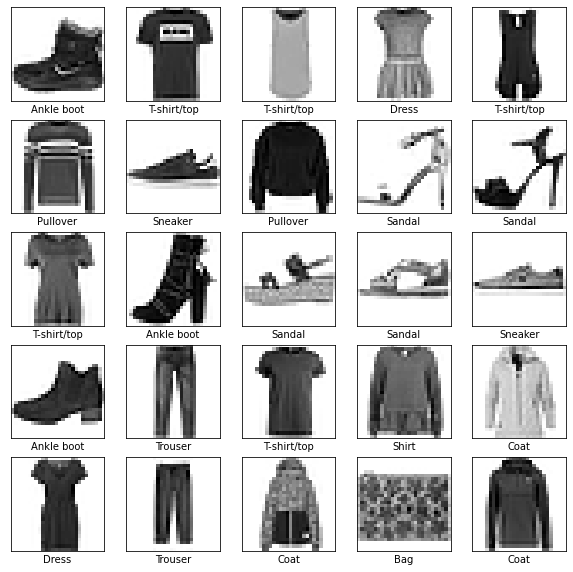

In [45]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [46]:
#층 설정

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


In [49]:
#모델 컴파일
#손실 함수: loss
#방향: 옵티마이저
    
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [69]:
model.fit(train_images, train_labels, epochs=20)


Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1377 - accuracy: 0.9488
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1333 - accuracy: 0.9501
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1315 - accuracy: 0.9515
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1323 - accuracy: 0.9502
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1264 - accuracy: 0.9530
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1255 - accuracy: 0.9530
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1208 - accuracy: 0.9550
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1204 - accuracy: 0.9547
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1171 - accuracy: 0.9550
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.114

In [58]:
# 정확도 평가
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
#test_loss, test_acc = model.evaluate(train_images, train_labels, verbose=2)

print('\n테스트 정확도:', test_acc)


313/313 - 0s - loss: 0.4211 - accuracy: 0.8846

테스트 정확도: 0.8845999836921692


In [59]:
# 예측 만들기
predictions = model.predict(test_images)


In [62]:
predictions[0]
np.argmax(predictions[0])

9

In [63]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


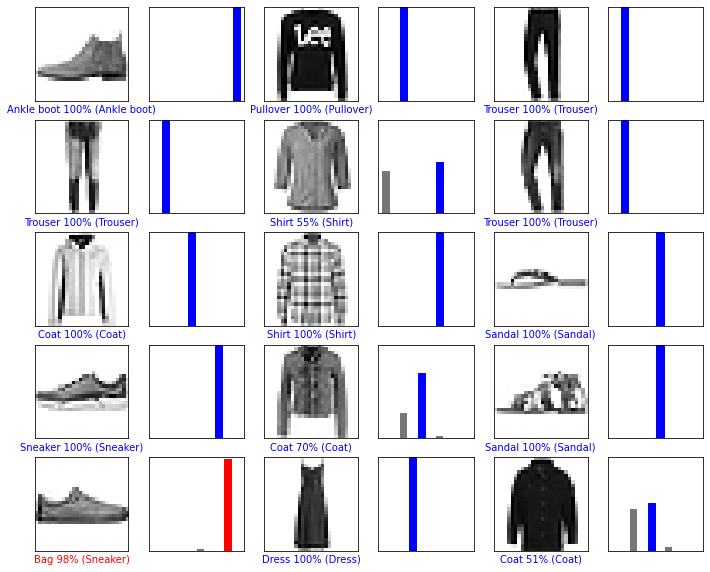

In [66]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()


In [68]:
img = (np.expand_dims(img,0))

print(img.shape)


NameError: name 'img' is not defined